## Lunar Data

### Imports

In [304]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from datetime import datetime, date, time, timezone

# Using datetime.combine()
d = date(2005, 7, 14)
t = time(12, 30)
datetime.combine(d, t)

datetime.datetime(2005, 7, 14, 12, 30)

## Displaying Lunar Data from 5/21/23 to 11/1/23

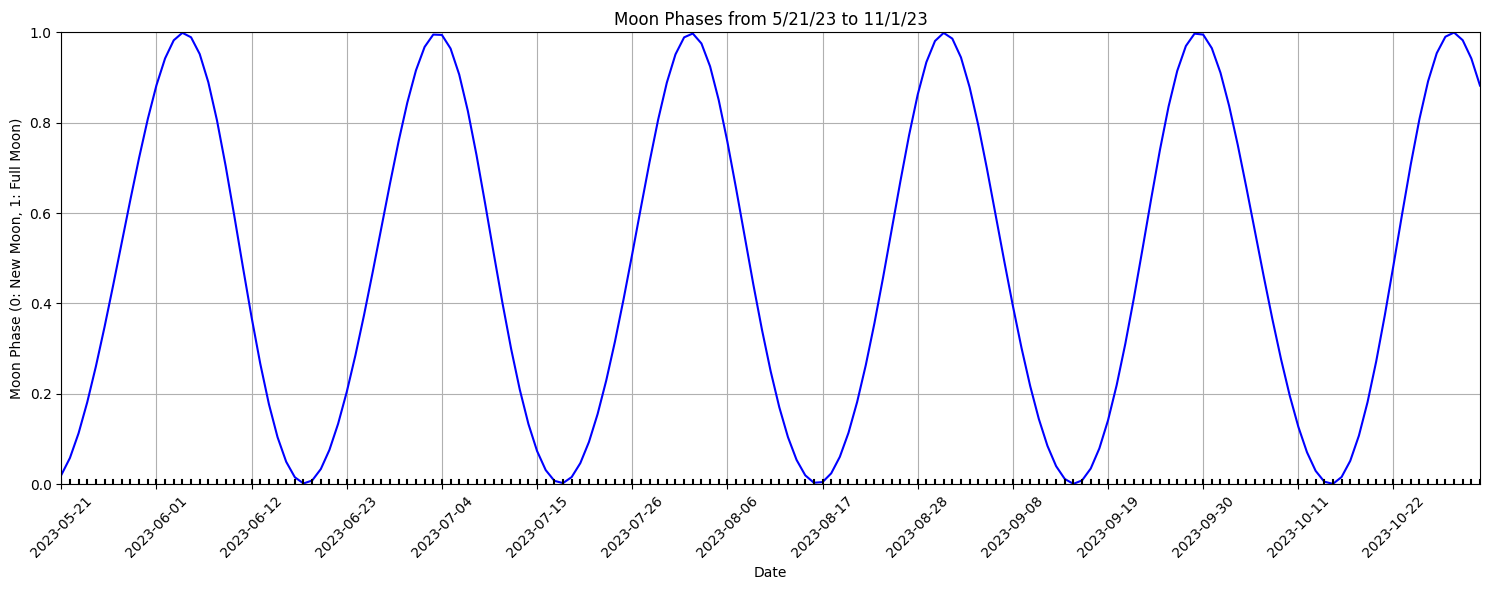

In [305]:
import ephem
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Define the start and end dates
start_date = datetime(2023, 5, 21)
end_date = datetime(2023, 11, 1)

# Generate a list of dates within the range
date_range = [start_date + timedelta(days=i) for i in range((end_date - start_date).days + 1)]

# Calculate moon phases for each date
moon_phases = []

for date in date_range:
    observer = ephem.Observer()
    observer.date = date
    moon = ephem.Moon(observer)
    moon_phases.append(moon.phase / 100)  # Normalize phase to [0, 1]

# Create the moon phase graph
plt.figure(figsize=(15, 6))  # Adjust the figure width
plt.plot(date_range, moon_phases, color='b')
plt.title('Moon Phases from 5/21/23 to 11/1/23')
plt.xlabel('Date')
plt.ylabel('Moon Phase (0: New Moon, 1: Full Moon)')

# Specify the desired number of ticks on the x-axis
num_ticks = 15  # Adjust this number as needed
step = len(date_range) // (num_ticks - 1)
xticks = [date_range[i] for i in range(0, len(date_range), step)]

plt.xticks(xticks, rotation=45)
plt.ylim(0, 1)
plt.xlim(start_date, end_date)  # Adjust the x-axis limits

# Add markers for each day
for date in date_range:
    plt.plot([date, date], [0, 0.01], color='black')  # Adjust the vertical marker size as needed
    

plt.tight_layout()
plt.grid(True)
plt.show()





## Bat Call Data

In [306]:
env_file2 = "/Users/MBall/PycharmProjects/BATMO/batmo/batdetect2-calls/cumulative_activity__Foliage_30T__formatted.csv"
foliage_df = pd.read_csv(env_file2)

env_file3 = '/Users/MBall/PycharmProjects/BATMO/batmo/batdetect2-calls/cumulative_activity__Central_30T__formatted.csv'
centralpond_df = pd.read_csv(env_file3)

env_file4 = '/Users/MBall/PycharmProjects/BATMO/batmo/batdetect2-calls/cumulative_activity__Telephone_30T__formatted.csv'
telephonefield_df = pd.read_csv(env_file4)

In [307]:
# Assuming 'Date' and 'Time' are separate columns in the DataFrame df
# Foliage
foliage_df['Datetime'] = pd.to_datetime(foliage_df['Time'] + ' ' + foliage_df['Date'], format='%H:%M %m-%d-%y')


# Central Pond
centralpond_df['Datetime'] = pd.to_datetime(centralpond_df['Time'] + ' ' + centralpond_df['Date'], format='%H:%M %m-%d-%y')

# Telephone Field
telephonefield_df['Datetime'] = pd.to_datetime(telephonefield_df['Time'] + ' ' + telephonefield_df['Date'], format='%H:%M %m-%d-%y')

In [308]:
foliage_df

,Time,Date,Bat Calls,Datetime
0,03:00,05-31-23,1.0,2023-05-31 03:00:00
1,03:30,05-31-23,1.0,2023-05-31 03:30:00
2,04:00,05-31-23,7.0,2023-05-31 04:00:00
3,04:30,05-31-23,148.0,2023-05-31 04:30:00
4,05:00,05-31-23,252.0,2023-05-31 05:00:00
...,...,...,...,...
1171,11:00,07-25-23,0.0,2023-07-25 11:00:00
1172,11:30,07-25-23,0.0,2023-07-25 11:30:00
1173,12:00,07-25-23,0.0,2023-07-25 12:00:00
1174,12:30,07-25-23,0.0,2023-07-25 12:30:00


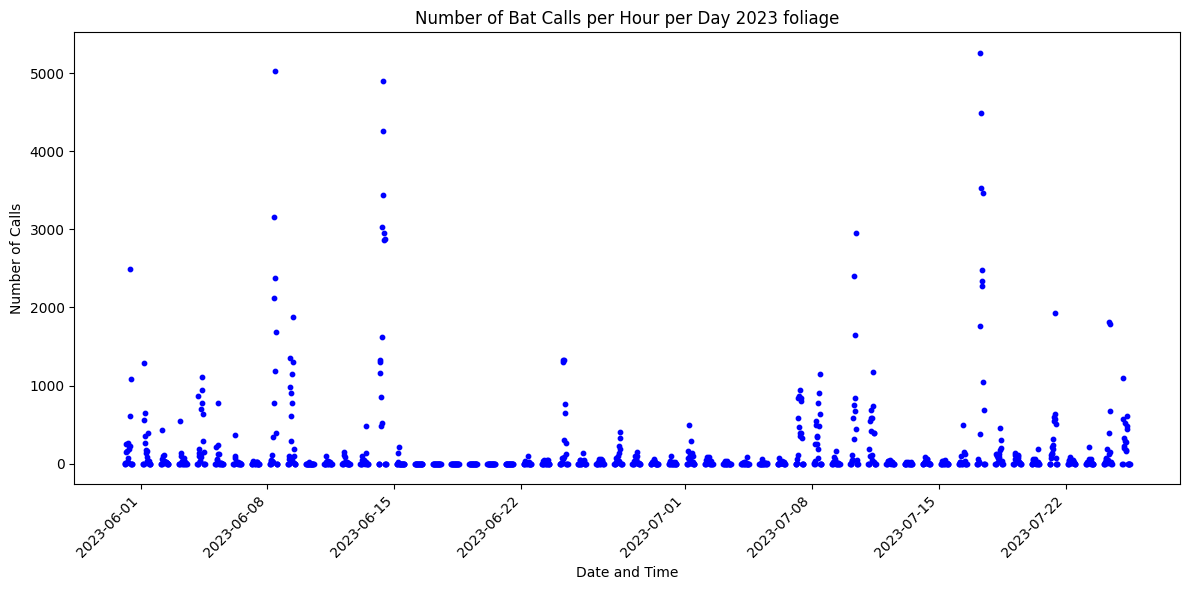

In [309]:
# Assuming you already have a DataFrame called 'foliage_df' with the data
# Let's assume that the 'Date' column is already in datetime format

# Create a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(foliage_df['Datetime'], foliage_df['Bat Calls'], s=10, marker='o', color='b')

# Set axis labels and title
plt.xlabel('Date and Time')
plt.ylabel('Number of Calls')
plt.title('Number of Bat Calls per Hour per Day 2023 foliage')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


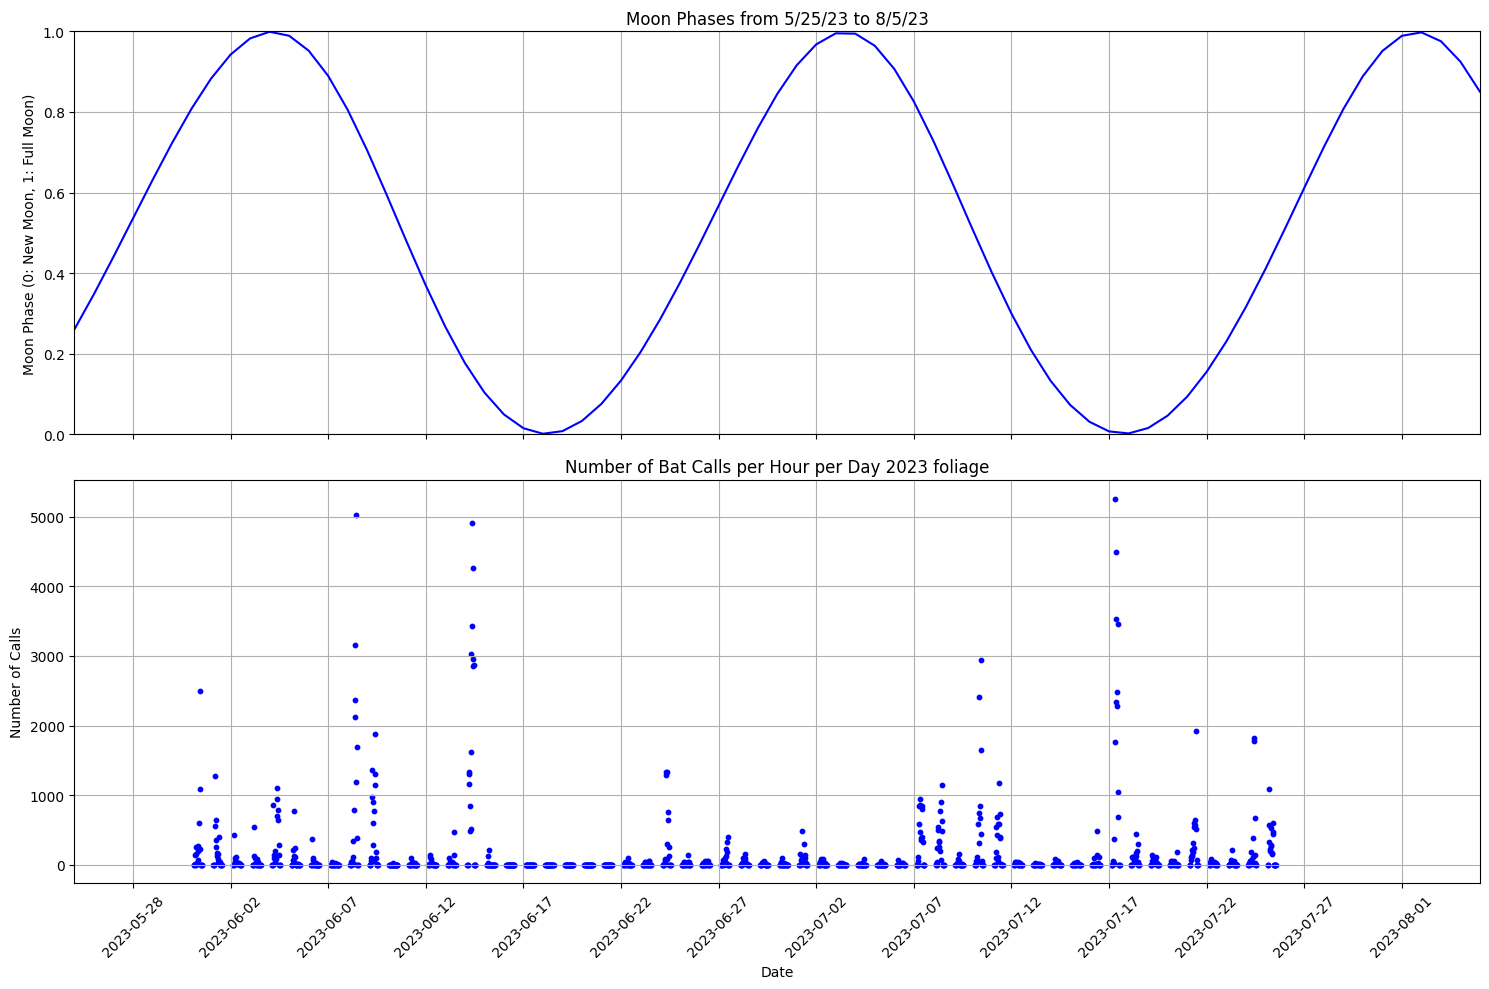

In [310]:
import ephem
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Define the start and end dates
start_date = datetime(2023, 5, 25)
end_date = datetime(2023, 8, 5)

# Generate a list of dates within the range
date_range = [start_date + timedelta(days=i) for i in range((end_date - start_date).days + 1)]

# Calculate moon phases for each date
moon_phases = []

for date in date_range:
    observer = ephem.Observer()
    observer.date = date
    moon = ephem.Moon(observer)
    moon_phases.append(moon.phase / 100)  # Normalize phase to [0, 1]

# Load foliage_df (assuming you have it loaded somewhere in your code)
# foliage_df = ...

# Create a 2x1 grid of subplots (2 rows, 1 column)
fig, axs = plt.subplots(2, 1, figsize=(15, 10), sharex=True)  # Share x-axis

# Plot moon phases in the first subplot
axs[0].plot(date_range, moon_phases, color='b')
axs[0].set_title('Moon Phases from 5/25/23 to 8/5/23')
axs[0].set_ylabel('Moon Phase (0: New Moon, 1: Full Moon)')
axs[0].set_ylim(0, 1)
axs[0].grid(True)

# Plot scatter plot in the second subplot
axs[1].scatter(foliage_df['Datetime'], foliage_df['Bat Calls'], s=10, marker='o', color='b')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Number of Calls')
axs[1].set_title('Number of Bat Calls per Hour per Day 2023 foliage')
axs[1].set_xlim(start_date, end_date)
axs[1].grid(True)

# Adjust x-axis ticks for better readability
axs[0].xaxis.set_major_locator(plt.MaxNLocator(15))  # Increase the number of ticks
axs[0].tick_params(axis='x', rotation=45)
axs[1].xaxis.set_major_locator(plt.MaxNLocator(15))  # Increase the number of ticks
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()





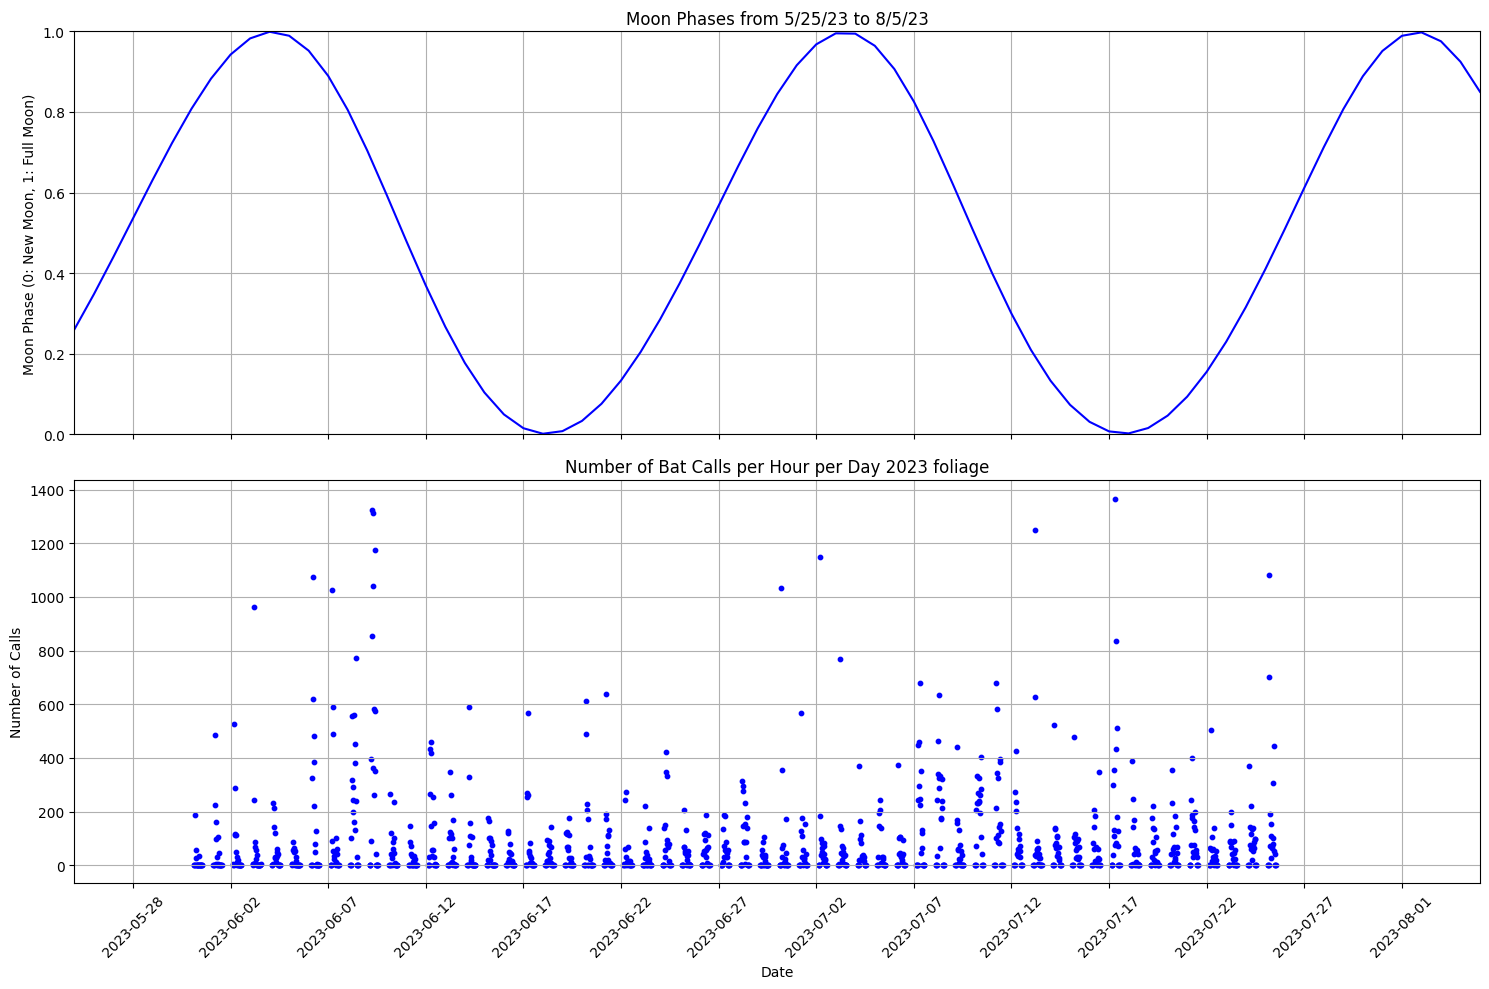

In [311]:
import ephem
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Define the start and end dates
start_date = datetime(2023, 5, 25)
end_date = datetime(2023, 8, 5)

# Generate a list of dates within the range
date_range = [start_date + timedelta(days=i) for i in range((end_date - start_date).days + 1)]

# Calculate moon phases for each date
moon_phases = []

for date in date_range:
    observer = ephem.Observer()
    observer.date = date
    moon = ephem.Moon(observer)
    moon_phases.append(moon.phase / 100)  # Normalize phase to [0, 1]

# Load foliage_df (assuming you have it loaded somewhere in your code)
# foliage_df = ...

# Create a 2x1 grid of subplots (2 rows, 1 column)
fig, axs = plt.subplots(2, 1, figsize=(15, 10), sharex=True)  # Share x-axis

# Plot moon phases in the first subplot
axs[0].plot(date_range, moon_phases, color='b')
axs[0].set_title('Moon Phases from 5/25/23 to 8/5/23')
axs[0].set_ylabel('Moon Phase (0: New Moon, 1: Full Moon)')
axs[0].set_ylim(0, 1)
axs[0].grid(True)

# Plot scatter plot in the second subplot
axs[1].scatter(foliage_df['Datetime'], centralpond_df['Bat Calls'], s=10, marker='o', color='b')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Number of Calls')
axs[1].set_title('Number of Bat Calls per Hour per Day 2023 foliage')
axs[1].set_xlim(start_date, end_date)
axs[1].grid(True)

# Adjust x-axis ticks for better readability
axs[0].xaxis.set_major_locator(plt.MaxNLocator(15))  # Increase the number of ticks
axs[0].tick_params(axis='x', rotation=45)
axs[1].xaxis.set_major_locator(plt.MaxNLocator(15))  # Increase the number of ticks
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


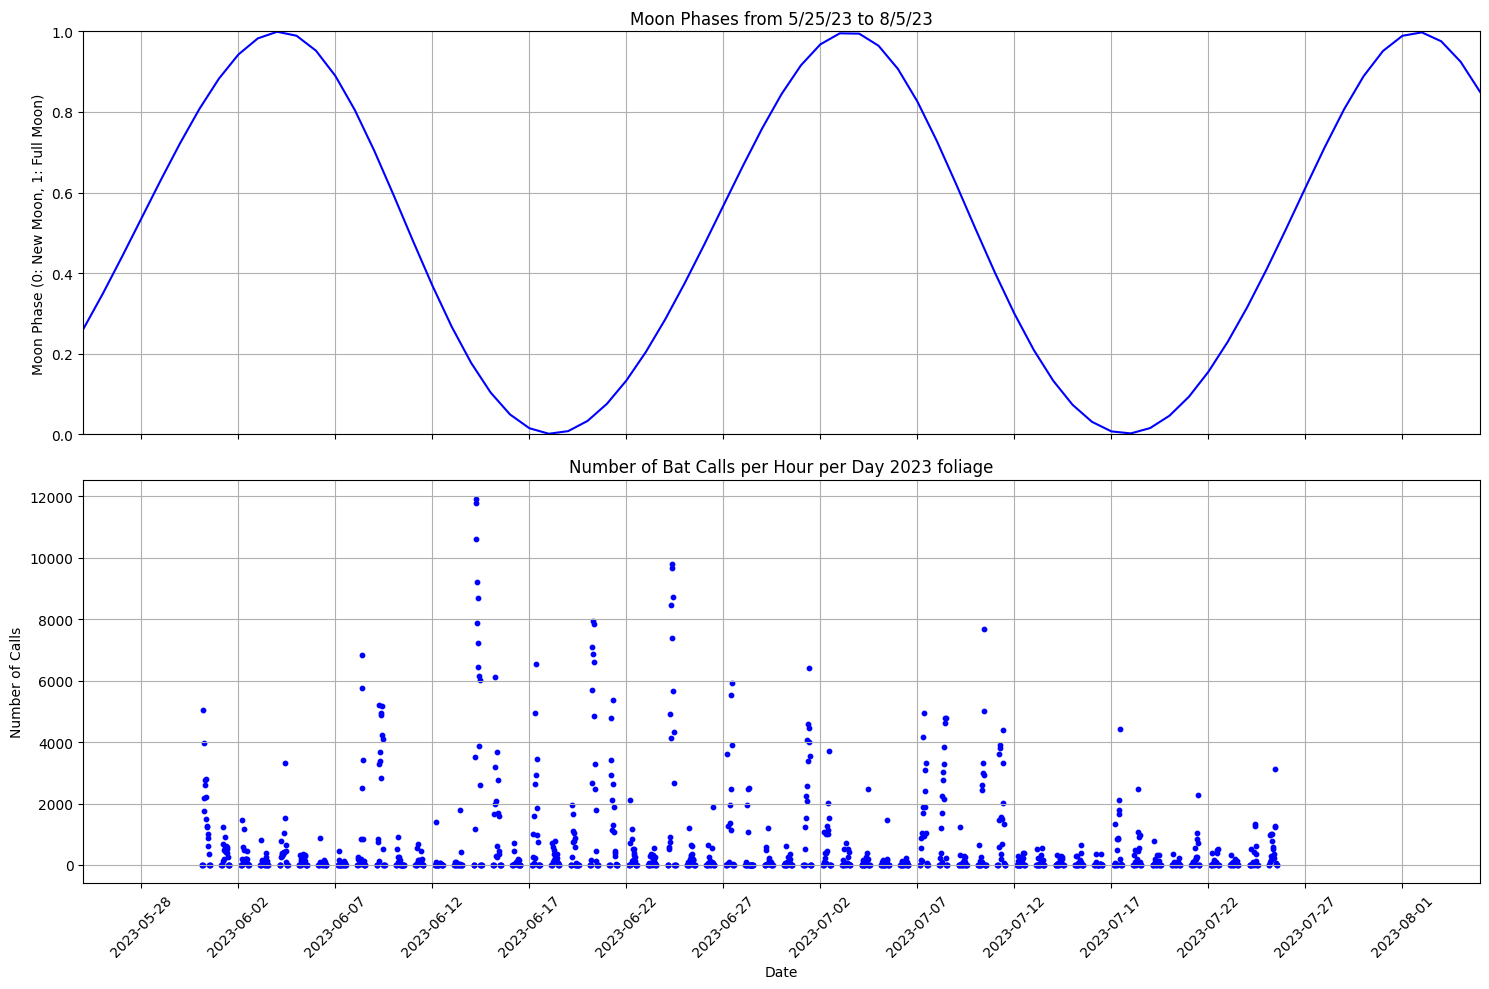

In [312]:
import ephem
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Define the start and end dates
start_date = datetime(2023, 5, 25)
end_date = datetime(2023, 8, 5)

# Generate a list of dates within the range
date_range = [start_date + timedelta(days=i) for i in range((end_date - start_date).days + 1)]

# Calculate moon phases for each date
moon_phases = []

for date in date_range:
    observer = ephem.Observer()
    observer.date = date
    moon = ephem.Moon(observer)
    moon_phases.append(moon.phase / 100)  # Normalize phase to [0, 1]

# Load foliage_df (assuming you have it loaded somewhere in your code)
# foliage_df = ...

# Create a 2x1 grid of subplots (2 rows, 1 column)
fig, axs = plt.subplots(2, 1, figsize=(15, 10), sharex=True)  # Share x-axis

# Plot moon phases in the first subplot
axs[0].plot(date_range, moon_phases, color='b')
axs[0].set_title('Moon Phases from 5/25/23 to 8/5/23')
axs[0].set_ylabel('Moon Phase (0: New Moon, 1: Full Moon)')
axs[0].set_ylim(0, 1)
axs[0].grid(True)

# Plot scatter plot in the second subplot
axs[1].scatter(foliage_df['Datetime'], telephonefield_df['Bat Calls'], s=10, marker='o', color='b')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Number of Calls')
axs[1].set_title('Number of Bat Calls per Hour per Day 2023 foliage')
axs[1].set_xlim(start_date, end_date)
axs[1].grid(True)

# Adjust x-axis ticks for better readability
axs[0].xaxis.set_major_locator(plt.MaxNLocator(15))  # Increase the number of ticks
axs[0].tick_params(axis='x', rotation=45)
axs[1].xaxis.set_major_locator(plt.MaxNLocator(15))  # Increase the number of ticks
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [313]:
# Ensure 'Datetime' column is in datetime format
foliage_df['Datetime'] = pd.to_datetime(foliage_df['Datetime'])
centralpond_df['Datetime'] = pd.to_datetime(centralpond_df['Datetime'])
telephonefield_df['Datetime'] = pd.to_datetime(telephonefield_df['Datetime'])

# Set 'Datetime' as the index
foliage_df.set_index('Datetime', inplace=True)
centralpond_df.set_index('Datetime', inplace=True)
telephonefield_df.set_index('Datetime', inplace=True)

# Resample the bat call data to nightly intervals and calculate the max and mean
foliage_df_resampled = foliage_df['Bat Calls'].resample('D').agg(['max', 'mean'])
centralpond_df_resampled = centralpond_df['Bat Calls'].resample('D').agg(['max', 'mean'])
telephonefield_df_resampled = telephonefield_df['Bat Calls'].resample('D').agg(['max', 'mean'])

# Reset the index to have the date as a column
foliage_df_resampled.reset_index(inplace=True)
centralpond_df_resampled.reset_index(inplace=True)
telephonefield_df_resampled.reset_index(inplace=True)



In [314]:
foliage_df_resampled


,Datetime,max,mean
0,2023-05-31,2496.0,276.380952
1,2023-06-01,1283.0,199.714286
2,2023-06-02,430.0,44.095238
3,2023-06-03,544.0,48.333333
4,2023-06-04,1107.0,295.285714
5,2023-06-05,776.0,77.333333
6,2023-06-06,372.0,30.714286
7,2023-06-07,35.0,7.476190
8,2023-06-08,5023.0,825.714286
9,2023-06-09,1882.0,465.000000


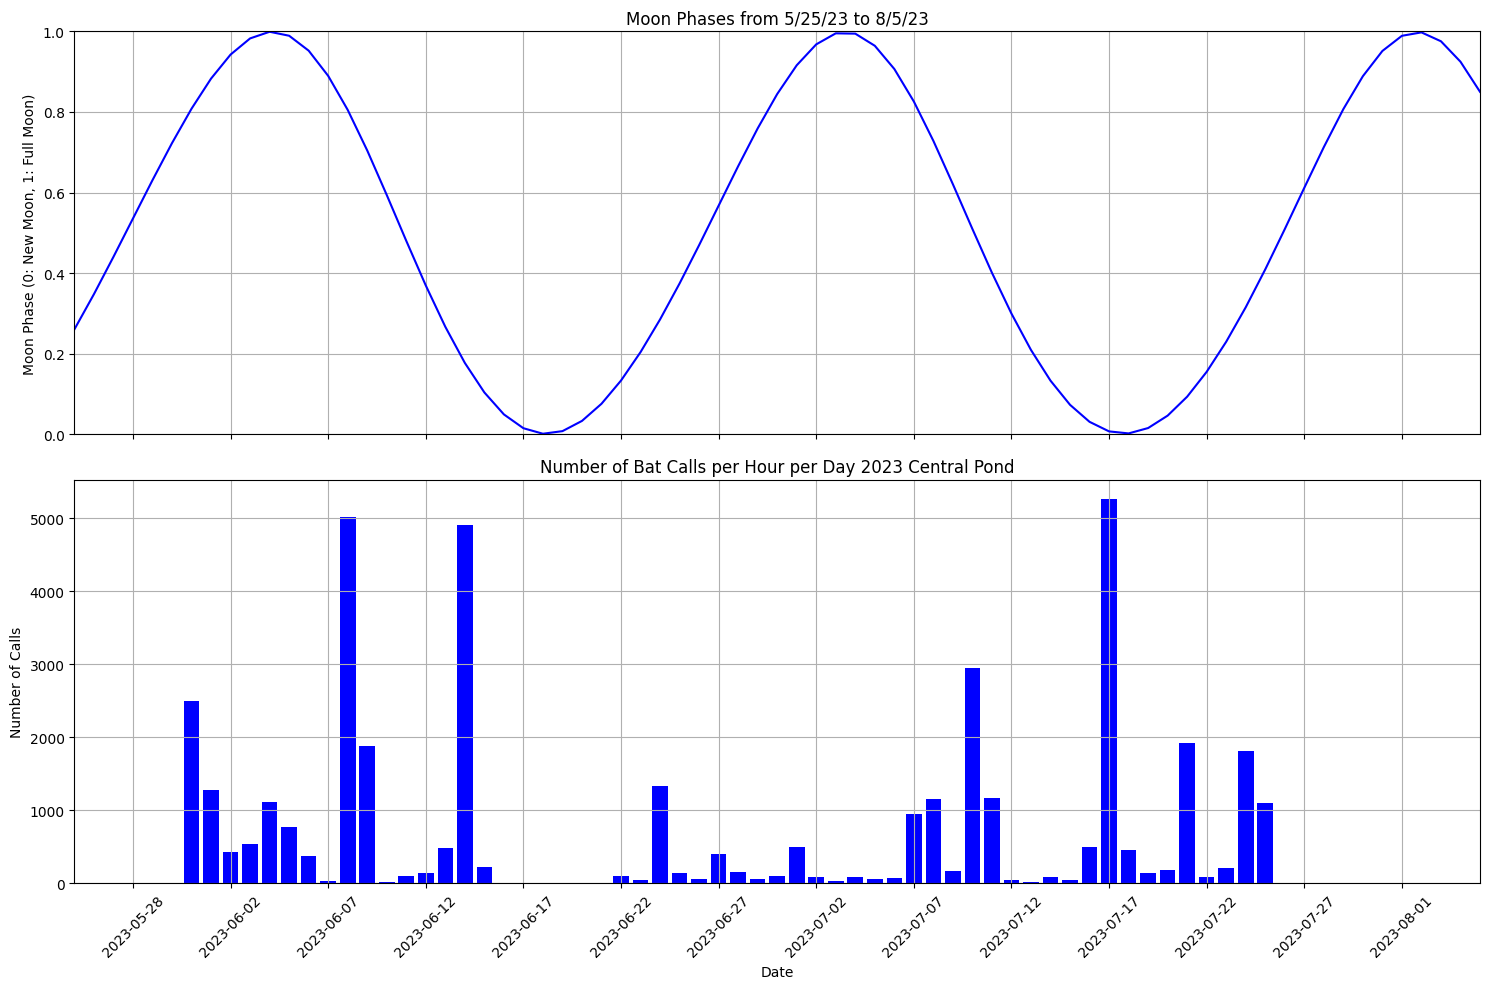

In [330]:
import ephem
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Define the start and end dates
start_date = datetime(2023, 5, 25)
end_date = datetime(2023, 8, 5)

# Generate a list of dates within the range
date_range = [start_date + timedelta(days=i) for i in range((end_date - start_date).days + 1)]

# Calculate moon phases for each date
moon_phases = []

for date in date_range:
    observer = ephem.Observer()
    observer.date = date
    moon = ephem.Moon(observer)
    moon_phases.append(moon.phase / 100)  # Normalize phase to [0, 1]

# Load foliage_df_resampled and centralpond_df_resampled
# foliage_df_resampled = ...
# centralpond_df_resampled = ...

# Create a 2x1 grid of subplots (2 rows, 1 column)
fig, axs = plt.subplots(2, 1, figsize=(15, 10), sharex=True)  # Share x-axis

# Plot moon phases in the first subplot
axs[0].plot(date_range, moon_phases, color='b')
axs[0].set_title('Moon Phases from 5/25/23 to 8/5/23')
axs[0].set_ylabel('Moon Phase (0: New Moon, 1: Full Moon)')
axs[0].set_ylim(0, 1)
axs[0].grid(True)

# Plot bar graph in the second subplot
axs[1].bar(foliage_df_resampled['Datetime'], foliage_df_resampled['max'], color='b', width=0.8)
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Number of Calls')
axs[1].set_title('Number of Bat Calls per Hour per Day 2023 Foliage')
axs[1].set_xlim(start_date, end_date)
axs[1].grid(True)

# Adjust x-axis ticks for better readability
axs[0].xaxis.set_major_locator(plt.MaxNLocator(15))  # Increase the number of ticks
axs[0].tick_params(axis='x', rotation=45)
axs[1].xaxis.set_major_locator(plt.MaxNLocator(15))  # Increase the number of ticks
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


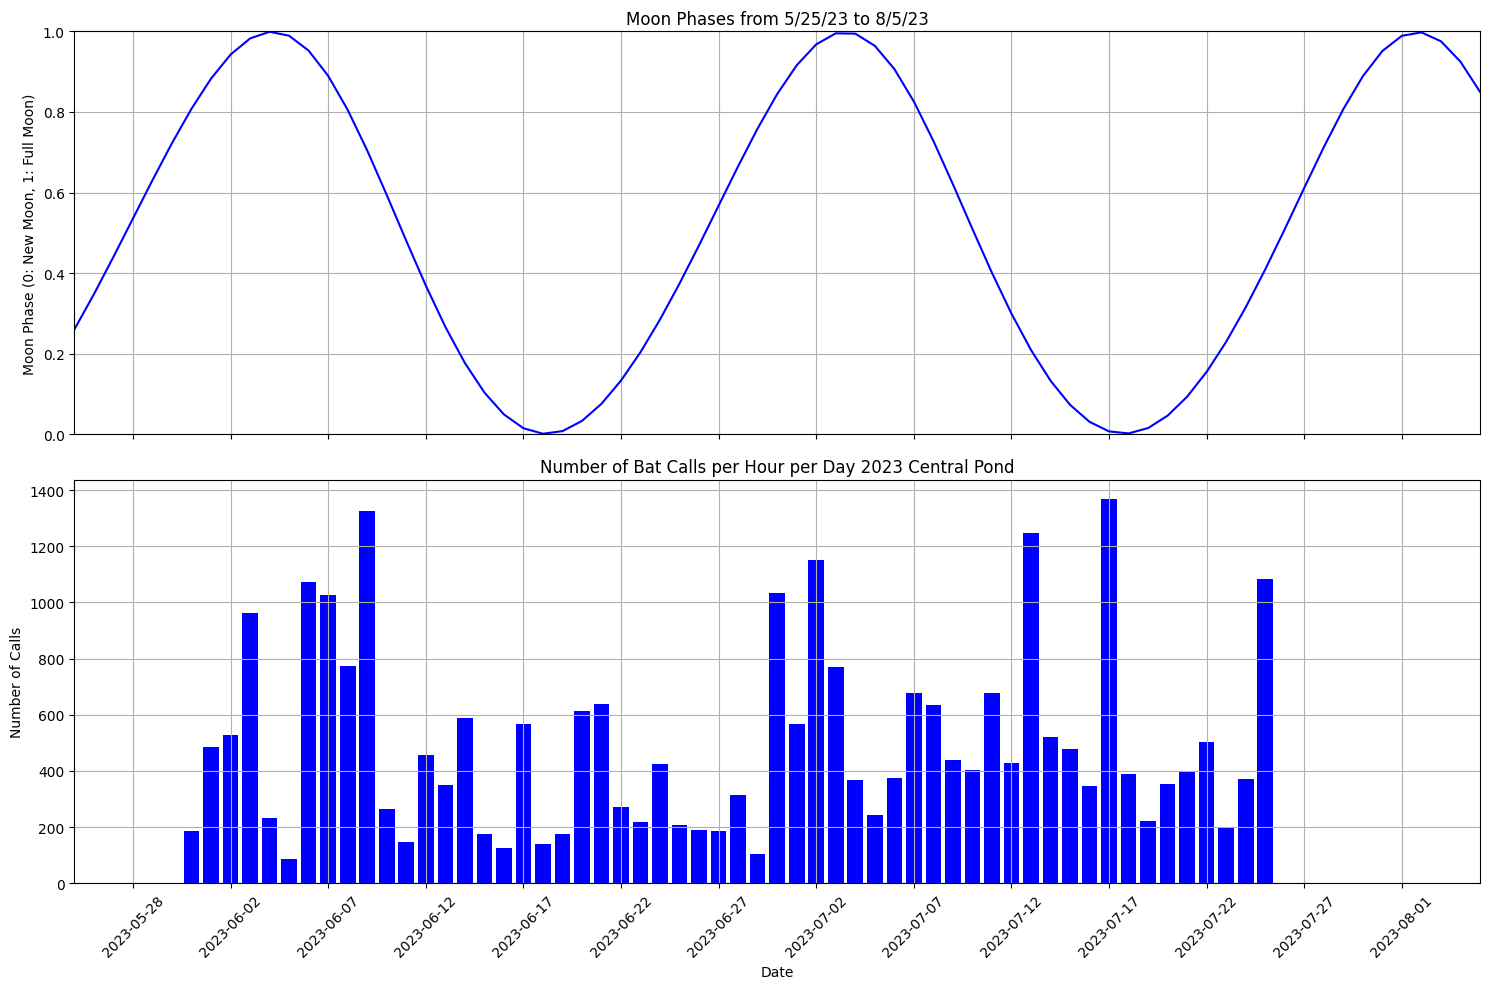

In [329]:
import ephem
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Define the start and end dates
start_date = datetime(2023, 5, 25)
end_date = datetime(2023, 8, 5)

# Generate a list of dates within the range
date_range = [start_date + timedelta(days=i) for i in range((end_date - start_date).days + 1)]

# Calculate moon phases for each date
moon_phases = []

for date in date_range:
    observer = ephem.Observer()
    observer.date = date
    moon = ephem.Moon(observer)
    moon_phases.append(moon.phase / 100)  # Normalize phase to [0, 1]

# Load foliage_df_resampled and centralpond_df_resampled
# foliage_df_resampled = ...
# centralpond_df_resampled = ...

# Create a 2x1 grid of subplots (2 rows, 1 column)
fig, axs = plt.subplots(2, 1, figsize=(15, 10), sharex=True)  # Share x-axis

# Plot moon phases in the first subplot
axs[0].plot(date_range, moon_phases, color='b')
axs[0].set_title('Moon Phases from 5/25/23 to 8/5/23')
axs[0].set_ylabel('Moon Phase (0: New Moon, 1: Full Moon)')
axs[0].set_ylim(0, 1)
axs[0].grid(True)

# Plot bar graph in the second subplot
axs[1].bar(centralpond_df_resampled['Datetime'], centralpond_df_resampled['max'], color='b', width=0.8)
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Number of Calls')
axs[1].set_title('Number of Bat Calls per Hour per Day 2023 Central Pond')
axs[1].set_xlim(start_date, end_date)
axs[1].grid(True)

# Adjust x-axis ticks for better readability
axs[0].xaxis.set_major_locator(plt.MaxNLocator(15))  # Increase the number of ticks
axs[0].tick_params(axis='x', rotation=45)
axs[1].xaxis.set_major_locator(plt.MaxNLocator(15))  # Increase the number of ticks
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


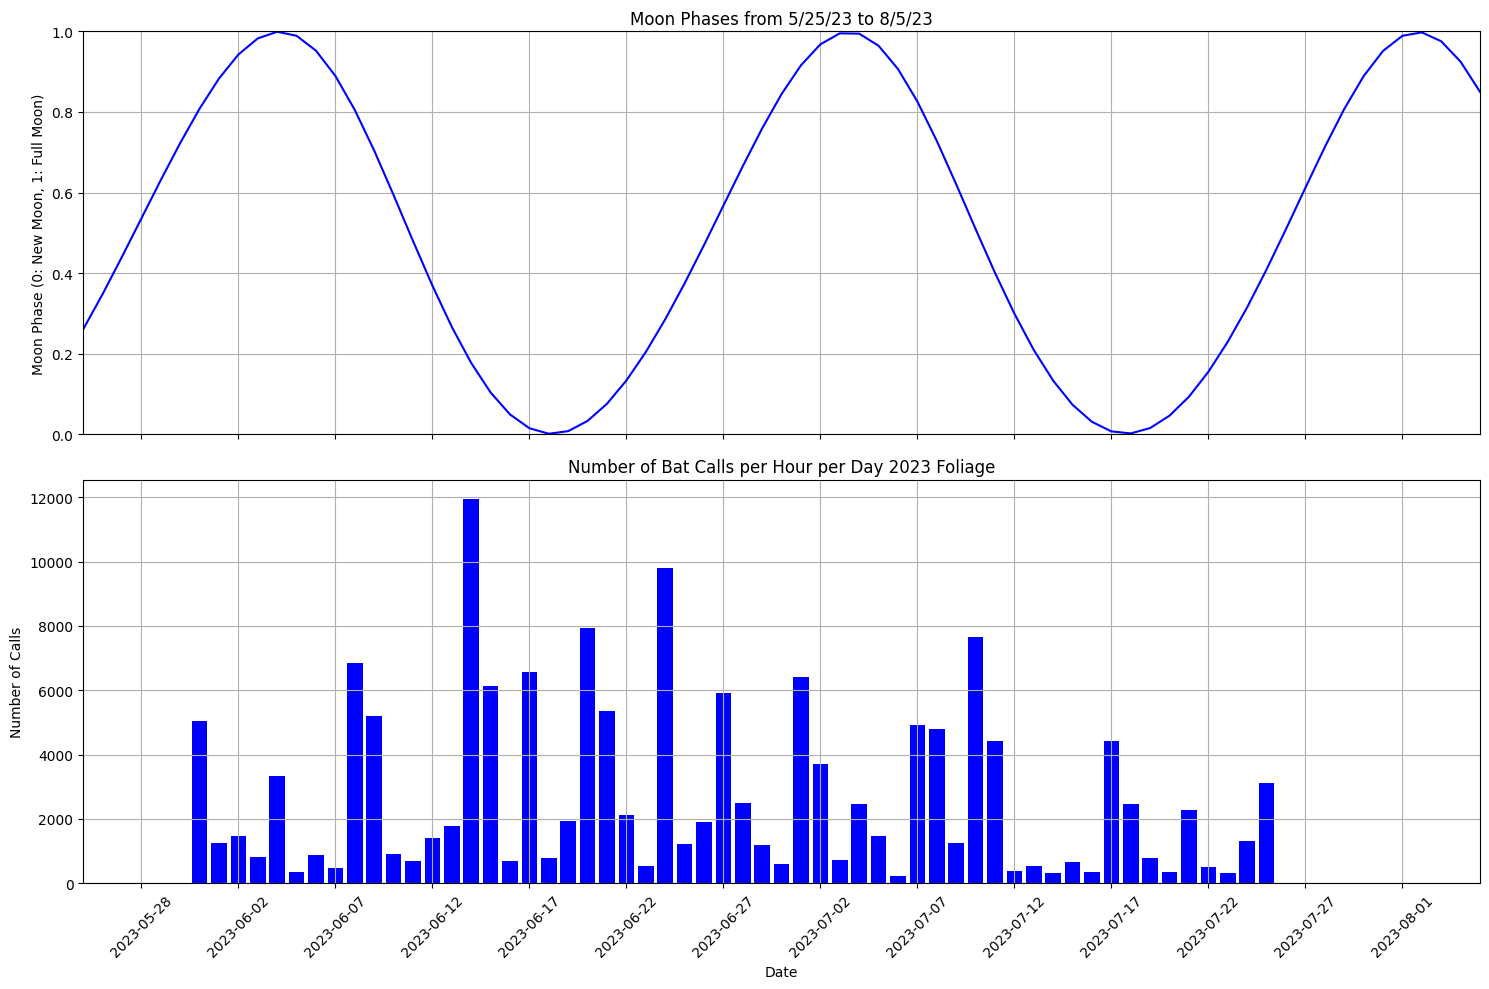

In [331]:
import ephem
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Define the start and end dates
start_date = datetime(2023, 5, 25)
end_date = datetime(2023, 8, 5)

# Generate a list of dates within the range
date_range = [start_date + timedelta(days=i) for i in range((end_date - start_date).days + 1)]

# Calculate moon phases for each date
moon_phases = []

for date in date_range:
    observer = ephem.Observer()
    observer.date = date
    moon = ephem.Moon(observer)
    moon_phases.append(moon.phase / 100)  # Normalize phase to [0, 1]

# Load foliage_df_resampled and telephonefield_df_resampled
# foliage_df_resampled = ...
# centralpond_df_resampled = ...

# Create a 2x1 grid of subplots (2 rows, 1 column)
fig, axs = plt.subplots(2, 1, figsize=(15, 10), sharex=True)  # Share x-axis

# Plot moon phases in the first subplot
axs[0].plot(date_range, moon_phases, color='b')
axs[0].set_title('Moon Phases from 5/25/23 to 8/5/23')
axs[0].set_ylabel('Moon Phase (0: New Moon, 1: Full Moon)')
axs[0].set_ylim(0, 1)
axs[0].grid(True)

# Plot bar graph in the second subplot
axs[1].bar(telephonefield_df_resampled['Datetime'], telephonefield_df_resampled['max'], color='b', width=0.8)
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Number of Calls')
axs[1].set_title('Number of Bat Calls per Hour per Day 2023 Foliage')
axs[1].set_xlim(start_date, end_date)
axs[1].grid(True)

# Adjust x-axis ticks for better readability
axs[0].xaxis.set_major_locator(plt.MaxNLocator(15))  # Increase the number of ticks
axs[0].tick_params(axis='x', rotation=45)
axs[1].xaxis.set_major_locator(plt.MaxNLocator(15))  # Increase the number of ticks
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()
